In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('datasets_drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [6]:
df['Drug'].replace('DrugY', 'drugY', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.3+ KB


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


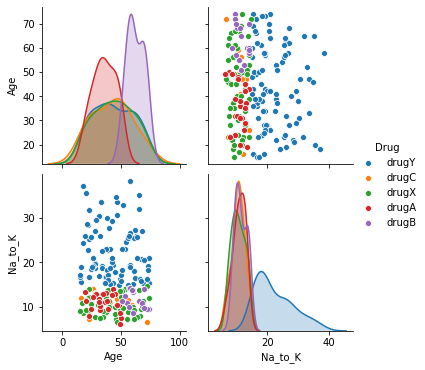

In [9]:
sns.pairplot(df, hue='Drug')

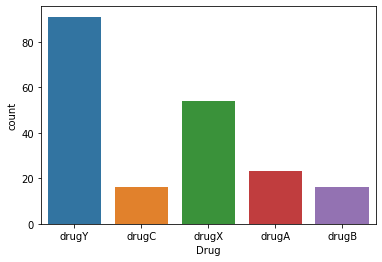

In [10]:
sns.countplot(x=df['Drug'], data=df)

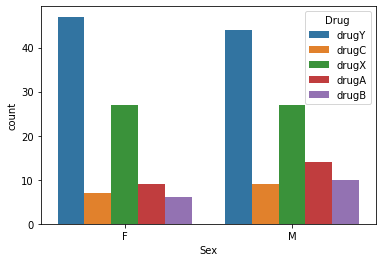

In [11]:
sns.countplot(x='Sex', hue='Drug', data=df)

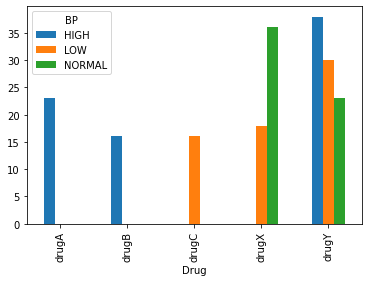

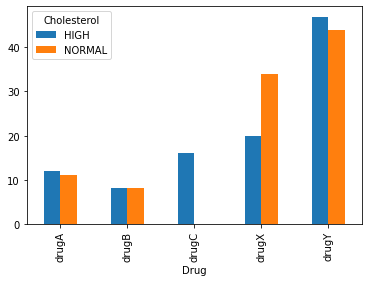

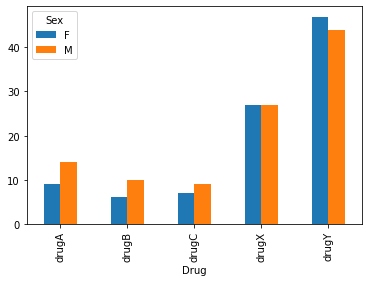

In [12]:
df.groupby('Drug')['BP'].value_counts().unstack().plot.bar()
df.groupby('Drug')['Cholesterol'].value_counts().unstack().plot.bar()
df.groupby('Drug')['Sex'].value_counts().unstack().plot.bar()

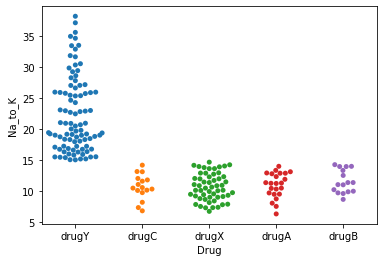

In [13]:
sns.swarmplot(x='Drug', y='Na_to_K', data=df)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
for features in cols:
    df[features] = le.fit_transform(df[features])

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Drug', axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression:

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [17]:
lr_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, lr_pred)*100,'%')

88.33333333333333 %


Gradient Booster Classifier:

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [20]:
gbc_pred = gbc.predict(X_test)

In [21]:
print(accuracy_score(y_test,gbc_pred)*100,'%')

100.0 %


Decision tree Classifier:

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
dtc_pred = dtc.predict(X_test)

In [24]:
print(accuracy_score(y_test, dtc_pred)*100,'%')

100.0 %


Random Forest Classifier:

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=22)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=22)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(accuracy_score(y_test, rfc_pred)*100,'%')

100.0 %
